# Support Vector Regression

## Objectives

- Implement and evaluate Support Vector Regression (SVR) models on synthetic and real advertising data.
- Optimize SVR models by adjusting hyperparameters such as `kernel`, `C`, and `epsilon` to improve predictive accuracy.

## Background

This notebook utilizes SVR to predict outcomes based on relationships in the data. SVR is particularly noted for its ability to manage non-linear data using kernel tricks and its robustness against overfitting in high-dimensional spaces.

Support Vector Regression (SVR) is an extension of Support Vector Machines (SVMs) for regression tasks. The key hyperparameters for SVR that need to be tuned for optimal performance are:

1. **Kernel Type (`kernel`)**:
   - Specifies the type of kernel to be used in the algorithm.
   - Common options include:
     - `linear`: A linear kernel.
     - `poly`: A polynomial kernel.
     - `rbf`: Radial basis function (Gaussian) kernel.
     - `sigmoid`: Sigmoid kernel.
   - The choice of kernel can greatly influence the model's performance and complexity.

2. **Regularization Parameter (`C`)**:
   - Controls the trade-off between achieving a low error on the training data and minimizing the model complexity.
   - A lower `C` value encourages a smoother decision boundary with fewer support vectors but may underfit.
   - A higher `C` value allows the model to fit the training data more precisely, which can lead to overfitting.

3. **Epsilon (`ε`)**:
   - Defines the margin of tolerance where no penalty is given to errors.
   - Errors within this margin are ignored in the training process, leading to a more robust model.
   - Larger values of `ε` can lead to a simpler model with fewer support vectors but might ignore significant errors.

4. **Gamma (`γ`)**:
   - This parameter is specific to the `rbf`, `poly`, and `sigmoid` kernels.
   - It defines the influence of a single training example.
   - Low values mean ‘far’ points are considered close, resulting in a smoother decision boundary.
   - High values imply that each point has a very narrow influence, potentially leading to overfitting.

5. **Degree (`degree`)**:
   - Relevant when using the polynomial kernel (`poly`).
   - It specifies the degree of the polynomial used.
   - Higher degrees can increase the model's complexity and capacity to fit the data.

6. **Coefficient (`coef0`)**:
   - Applicable for `poly` and `sigmoid` kernels.
   - It controls the influence of higher-order versus lower-order terms in the polynomial kernel and the offset in the sigmoid kernel.

7. **Tolerance for Stopping Criterion (`tol`)**:
   - Determines the stopping criterion for the algorithm's convergence.
   - Lower values of `tol` lead to higher precision in the solution but can increase computation time.

8. **Shrinking (`shrinking`)**:
   - A boolean parameter that decides whether to use the shrinking heuristic.
   - When set to `True`, it can speed up the training process in some cases.

9. **Cache Size (`cache_size`)**:
   - The size of the kernel cache in MB.
   - Larger cache sizes can improve the speed of the algorithm but will require more memory.

10. **Verbose (`verbose`)**:
    - A boolean parameter that controls the verbosity of the output during training.
    - Useful for debugging and understanding the training process.

### Examples of Common SVR Configurations

- **Linear SVR**:
  ```python
  from sklearn.svm import SVR

  svr_linear = SVR(kernel='linear', C=1.0)
  ```

- **Polynomial SVR**:
  ```python
  svr_poly = SVR(kernel='poly', C=1.0, degree=3, coef0=1)
  ```

- **RBF SVR**:
  ```python
  svr_rbf = SVR(kernel='rbf', C=1.0, gamma=0.1)
  ```

### Tuning Hyperparameters

Hyperparameter tuning for SVR typically involves using techniques like grid search or random search with cross-validation to find the optimal set of parameters that minimize the prediction error on unseen data.

## Datasets used

- Synthetic Dataset: Generated to model non-linear relationships between a single predictor and a response variable.
- Advertising Dataset: Contains advertising budgets across three media (TV, Radio, Newspaper) and corresponding product sales in 200 markets.

## Introduction

Support Vector Regression (`SVR`) is a Machine Learning algorithm for solving regression problems based on the well-known Support Vector Machine for classification.

`SVR` identifies a function that places as many points as possible within a margin defined by the epsilon (ε) parameter. This margin is often referred to as a "tube" in the context of the RBF kernel. Simultaneously, SVR minimizes the distance from the points outside this margin (the support vectors) to the regression function. These support vectors are the most influential data points in determining the regression outcome. Essentially, SVR seeks the function that best approximates the underlying numerical relationship in the data, balancing the trade-off between model complexity and prediction error.

In [1]:
import numpy as np; np.random.seed(50) 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={"figure.figsize":(6, 4)}) # set default figure size

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn import preprocessing
from sklearn.svm import SVR

## Understanding SVR

Let's start by generating some data.

### Generating data

In [3]:
# Generating some data
X = np.random.uniform(0, 10, size=100)
r = np.random.normal(0, 1, size=100)
y = np.sin(X) * X + r 
df = pd.DataFrame({'X': X , 'y': y})
df.head()

,X,y
0,4.946016,-4.864199
1,2.280831,1.095363
2,2.554739,1.051740
3,3.963299,-5.473279
4,3.773151,-2.090166


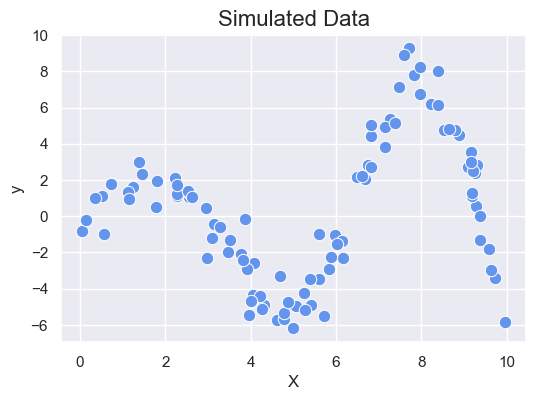

In [4]:
# Scatterplot
sns.scatterplot(x=df.X, y=df.y, s=80, color='cornflowerblue').set_title("Simulated Data", fontsize=16); 

### First SVR Model

In [5]:
# Splitting the sample into training and testing sets
X_train0, X_test0, y_train0, y_test0 = train_test_split(df.X, df.y, test_size=0.30, random_state=10)
print(f'Train Set: {X_train0.shape[0]} cases, \tTest Set: {X_test0.shape[0]} cases') 

Train Set: 70 cases, 	Test Set: 30 cases


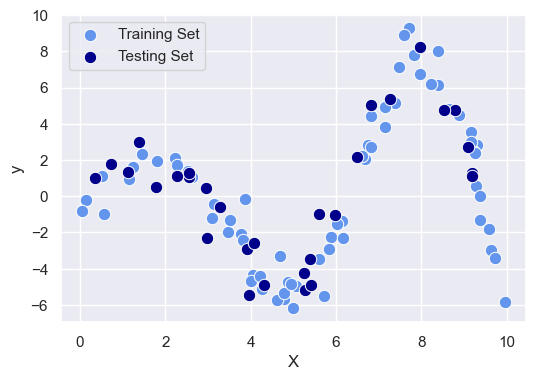

In [6]:
# Graphing the training and testing sets
sns.scatterplot(x=X_train0, y=y_train0, s=80, color='cornflowerblue', label='Training Set')
sns.scatterplot(x=X_test0,  y=y_test0,  s=80, color='darkblue',       label='Testing Set');  

In [7]:
# Saving training data
data_train0 = pd.concat([X_train0, y_train0], axis=1)
print(data_train0.shape)
data_train0.head()

(70, 2)


,X,y
42,7.967173,6.742356
34,9.313293,2.844190
84,8.644540,4.817236
52,4.678462,-3.293042
35,4.064202,-4.351079


In [8]:
# Saving testing data
data_test0 = pd.concat([X_test0, y_test0], axis=1)
print(data_test0.shape)
data_test0.head()

(30, 2)


,X,y
19,3.910874,-2.916379
14,9.091784,2.713716
43,4.320022,-4.926526
37,6.499159,2.141731
66,5.266641,-5.190980


In [9]:
# Defining the variables for the model
X=data_train0.X.values.reshape(-1, 1)
y=data_train0.y.values

In [10]:
# Setting the hyperparameters

# Kernel type ('rbf', 'linear', 'poly', 'sigmoid')
kernel = 'rbf'
# C is a regularization parameter.
C = 1       
# Epsilon (ε) determines the margin that fits the data.
epsilon = 1   
# Gamma ('γ') defines the influence of a single training example (kernel coefficient).
gamma = 0.1

#### The following analysis of the SVR algorithm will use the RBF kernel

In [11]:
# Setting the kernel
model0 = SVR(kernel=kernel, C=C, epsilon=epsilon, gamma=gamma)  
svr0 = model0.fit(X, y)
print('Number of support vectors:', len(svr0.support_vectors_))

Number of support vectors: 54


In [12]:
# Getting the support vectors index
# These are the indices of the support vectors in the training set.
# The support vectors are the data points that define the hyperplane (because the kernel is RBF).
svr0.support_

array([ 0,  2,  4,  5,  6,  8, 10, 11, 13, 15, 16, 18, 19, 20, 21, 23, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65,
       66, 67, 68])

In [13]:
# Prediction with training and testing cases
data_train0['y_pred'] = model0.predict(data_train0.X.values.reshape(-1, 1))
data_test0['y_pred']  = model0.predict(data_test0.X.values.reshape(-1, 1))

In [14]:
# Computing R² and RMSE on unseen data (testing set)
r2 = r2_score(data_test0.y, data_test0.y_pred)
rmse = root_mean_squared_error(data_test0.y, data_test0.y_pred)

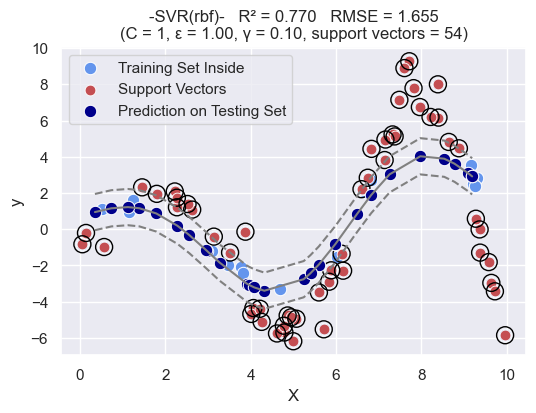

In [15]:
# Plotting the model, the tube, the support vectors and the testing prediction values

# Training Set (blue)
sns.scatterplot(x=data_train0.X, y=data_train0.y, color='cornflowerblue', s=80, 
                label='Training Set Inside')
# Support vectors (red)
s = svr0.support_
sns.scatterplot(x=data_train0.X.iloc[s], y=data_train0.y.iloc[s], color='r', s=60, 
                label='Support Vectors')
# Black circunference around the suppor vectors                
sns.scatterplot(x=data_train0.X.iloc[s], y=data_train0.y.iloc[s], 
                s=150, linewidth=1, facecolor='none', edgecolor='black')
# Estimated Model (black)                
sns.lineplot(x=data_test0.X, y=data_test0.y_pred, color='grey')
# Estimated tube superior edge (grey, dash line)
sns.lineplot(x=data_test0.X, y=data_test0.y_pred+epsilon, linestyle='--', color='grey') 
# Estimated tube inferior edge (grey, dash line)
sns.lineplot(x=data_test0.X, y=data_test0.y_pred-epsilon, linestyle='--', color='grey')
# Predicted test values (darkblue)
sns.scatterplot(x=data_test0.X, y=data_test0.y_pred, color='darkblue', s=80, 
                label='Prediction on Testing Set')
# Adding title                
plt.title(f'-SVR({kernel})-   R² = {r2:.3f}   RMSE = {rmse:.3f}\n' +
          f'(C = {C}, ε = {epsilon:.2f}, γ = {gamma:.2f}, support vectors = {len(s)})'); 

Let's define a function that computes and plots the SVR model.

In [16]:
def SVR_plot(df, epsilon=1, C=1, gamma=0.1):
    '''
    Compute and plot SVR model.
    df is a DataFrame with two columns: X and y
    '''
    X_train, X_test, y_train, y_test = train_test_split(df.X, df.y, test_size=0.30, random_state=10)
    data_train = pd.concat([X_train, y_train], axis=1)
    data_test  = pd.concat([X_test,  y_test],  axis=1)
    X=data_train.X.values.reshape(-1,1)
    y=data_train.y.values
    model = SVR(kernel='rbf', C=C, epsilon=epsilon, gamma=gamma)    
    svr = model.fit(X, y)
    data_test['y_pred'] = model.predict(data_test.X.values.reshape(-1,1))
    r2 = r2_score(data_test.y, data_test.y_pred)
    rmse = root_mean_squared_error(data_test.y, data_test.y_pred)
    s = svr.support_
    sns.scatterplot(x=data_train.X, y=data_train.y, color='cornflowerblue', s=80, 
                    label='Training Set Inside')
    sns.scatterplot(x=data_train.X.iloc[s], y=data_train.y.iloc[s], color='r', s=60, 
                    label='Support Vectors')
    sns.scatterplot(x=data_train.X.iloc[s], y=data_train.y.iloc[s], 
                    s=150, linewidth=1, facecolor='none', edgecolor='black')
    sns.lineplot(x=data_test.X, y=data_test.y_pred, color='grey')
    sns.lineplot(x=data_test.X, y=data_test.y_pred+epsilon, linestyle='--', color='grey') 
    sns.lineplot(x=data_test.X, y=data_test.y_pred-epsilon, linestyle='--', color='grey')
    sns.scatterplot(x=data_test.X, y=data_test.y_pred, color='darkblue', s=80, 
                    label='Prediction on Testing Set')          
    plt.title(f'-SVR-   R² = {r2:.3f}   RMSE = {rmse:.3f}\n' +
              f'(C = {C}, ε = {epsilon:.2f}, γ = {gamma:.2f}, support vectors = {len(s)})'); 

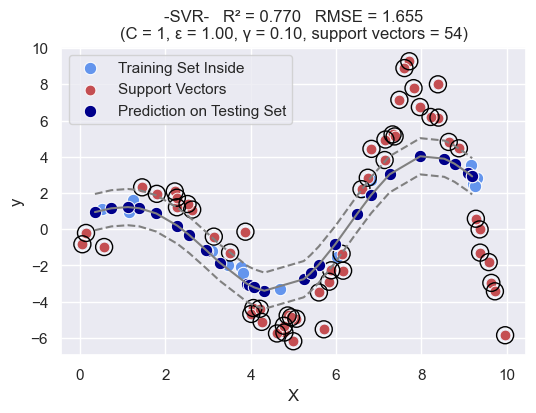

In [17]:
# Verifying
SVR_plot(df)

#### Modifying the `epsilon` parameter

The `epsilon` parameter is a margin of tolerance. It defines the tube as a zone around the hyperplane that includes most training cases. The algorithm considers points that fall inside that tube as correct predictions and are not penalized by the algorithm. They are not support vectors.

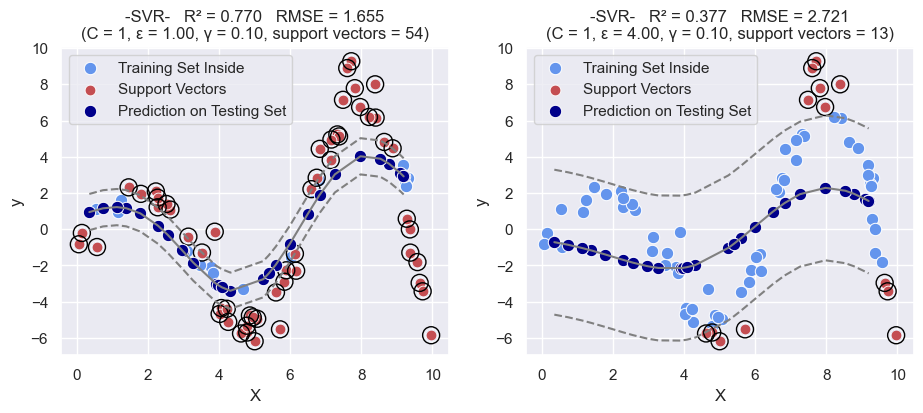

In [18]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
SVR_plot(df, epsilon=1, C=C, gamma=gamma)

plt.subplot(122)
SVR_plot(df, epsilon=4, C=C, gamma=gamma)

As we increase the epsilon, the tube is broader, with more training points inside. The new model fits poorly the data.
- The determination coefficient R² decreases.
- The square root of the mean squared error between the predicted and actual values of the test set increases.

#### Modifying the `C` parameter

- Controls the trade-off between fitting the training data and maintaining a smooth regression function.
- A higher value of C tries to fit the training data closely, which may lead to overfitting.
- A lower value of C encourages a simpler, more generalizable model but may underfit.

Let's increase the value of `C` from 1 to 100, and see how it affects the model.

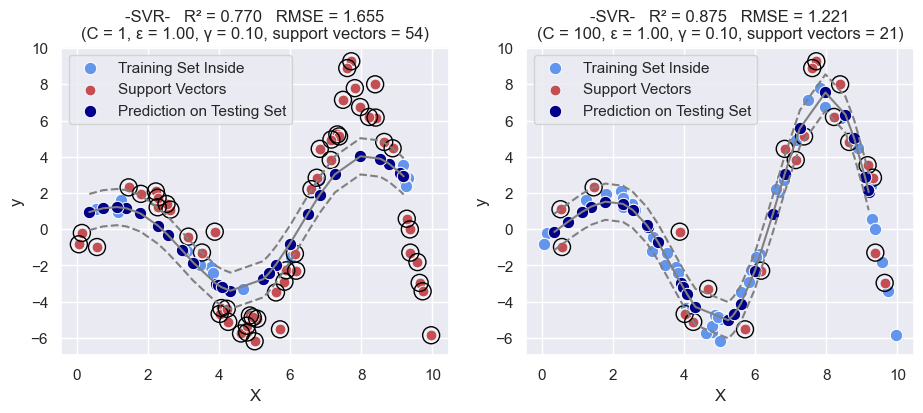

In [19]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
SVR_plot(df, epsilon=1, C=1, gamma=gamma)

plt.subplot(122)
SVR_plot(df, epsilon=1, C=100, gamma=gamma)

Now we have a better model. It fits better with the training data. The algorithm captures more training points inside the epsilon tube. By increasing the `C` value, the algorithm "highlights" the support vectors and cares more about minimizing their distance to the tube.

#### Modifying the `gamma` parameter

- It is a key parameter for non-linear kernels, including sigmoid.
- It determines how far the influence of a single training example reaches.
- A low value of gamma means 'far' influence, leading to a smoother decision boundary.
- A high value of gamma leads to 'near' influence, causing the model to fit more closely to the data.

Let's try to increase the value of `gamma` from 0.1 to 1.0

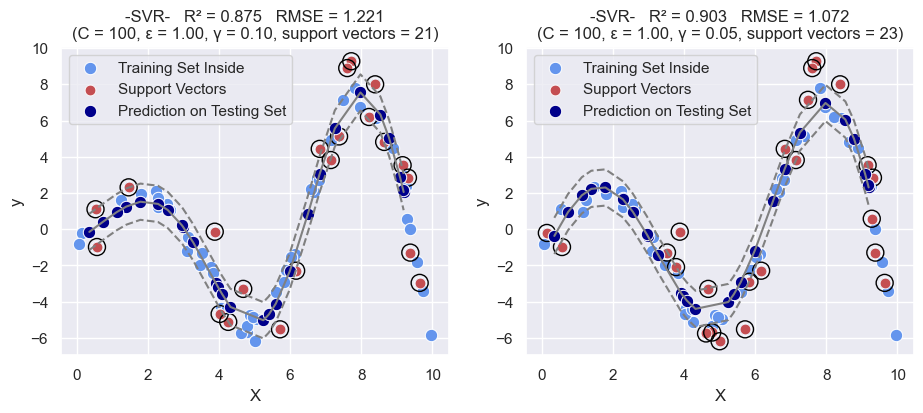

In [20]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
# This is the best result so far
SVR_plot(df, epsilon=1, C=100, gamma=0.1)

plt.subplot(122)
# This is the test changing gamma
SVR_plot(df, epsilon=1, C=100, gamma=0.05)

It is a better model. A lower value for `gamma` added two support vectors, and increased `R²` to 0.903

## Using a different kernel and an optimizing the hyperparameters

Now we know that there are multiple hyperparameters that could be optimized to achieve an optimal fit for the model. Some of the parameters apply to some kernels, but the kernel itself is one of the most important parameters because of its influence in the fit quality.

As an example, let's use a few search algorithms to find the best model for the `sigmoide` kernel.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the SVR model with the sigmoid kernel
svr = SVR(kernel='sigmoid')

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': [0.01, 0.1, 1],
    'coef0': [0.0, 0.1, 1]
}

# Set up GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(data_train0, y_train0)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
print(f"Best score found: {grid_search.best_score_:.3f}")

Best parameters found: {'C': 1, 'coef0': 0.0, 'epsilon': 0.1, 'gamma': 0.01}
Best score found: 0.911


This model is better than the previous one, 0.903 to 0.911, and it decreased `gamma` to 0.01

Now, even the `kernel` will be a parameter to optimize. Let's try to search for the best model using all the hyperparameters available.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Extract features (all columns except 'y') and target ('y')
X = df.drop(columns=['y'])
y = df['y']

# Define a pipeline that includes scaling and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('svr', SVR())                 # Apply SVR
])

# Define the parameter grid including the kernel type and its associated parameters
param_grid = [
    {'svr__kernel': ['linear'], 
     'svr__C': [0.1, 1, 10],
     'svr__epsilon': [0.01, 0.1, 1]},
    
    {'svr__kernel': ['poly'], 
     'svr__C': [0.1, 1, 10],
     'svr__epsilon': [0.01, 0.1, 1],
     'svr__degree': [2, 3, 4], 
     'svr__coef0': [0.0, 0.1, 1]},
    
    {'svr__kernel': ['rbf'], 
     'svr__C': [0.1, 1, 10], 
     'svr__epsilon': [0.01, 0.1, 1],
     'svr__gamma': [0.01, 0.1, 1]},

    {'svr__kernel': ['sigmoid'], 
     'svr__C': [0.1, 1, 10], 
     'svr__epsilon': [0.01, 0.1, 1],
     'svr__gamma': [0.01, 0.1, 1], 
     'svr__coef0': [0.0, 0.1, 1]}
]

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print(f"Best parameters found: {best_params}")
print(f"Best score: {best_score}")
print(f"Best model: {best_model}")

Fitting 5 folds for each of 198 candidates, totalling 990 fits
Best parameters found: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__gamma': 1, 'svr__kernel': 'rbf'}
Best score: 0.9097171200358896
Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=10, epsilon=0.01, gamma=1))])


In [23]:
def Plot_SVR_Model(df : pd.DataFrame, best_model : Pipeline, best_score : float):
    '''
    Plot a fitted SVR model based on its pipeline.
    It is a pipeline because we are using a StandardScaler and an SVR model together.
    If we were using only the SVR model, we would have used the SVR_plot function.
    This function is specific for the GridSearchCV pipeline (that is, trying several kernels and parameters)
    df is a DataFrame with two columns: X and y
    '''
    svr_step = best_model.named_steps['svr']
    support_indices = svr_step.support_
    support_vectors = svr_step.support_vectors_

    kernel = svr_step.kernel
    C = svr_step.C
    epsilon = svr_step.epsilon
    gamma = svr_step.gamma
    coef0 = svr_step.coef0
   
    sns.scatterplot(x=df.X, y=df.y, color='cornflowerblue', s=80, label='Training Set Inside')
    sns.scatterplot(x=df.X[support_indices], y=df.y[support_indices], color='r', s=60, label='Support Vectors')
    sns.scatterplot(x=df.X[support_indices], y=df.y[support_indices], s=150, linewidth=1, facecolor='none', edgecolor='black')
   
    # Format the title string with conditionals for optional parameters
    title = f"-SVR-   R² = {best_score:.3f}\n" \
            f"(kernel = {kernel}, " \
            f"C = {C:.1f}, " \
            f"ε = {epsilon:.2f}"

    # Include gamma if it is relevant for the selected kernel
    if gamma is not None:
        if isinstance(gamma, (int, float)):  # Check if gamma is a number
            title += f", γ = {gamma:.2f}"
        else:  # Handle string cases like 'scale' or 'auto'
            title += f", γ = {gamma}"
            
    # Add the number of support vectors
    title += f", support vectors = {len(support_vectors)})"

    # Set the plot title
    plt.title(title)

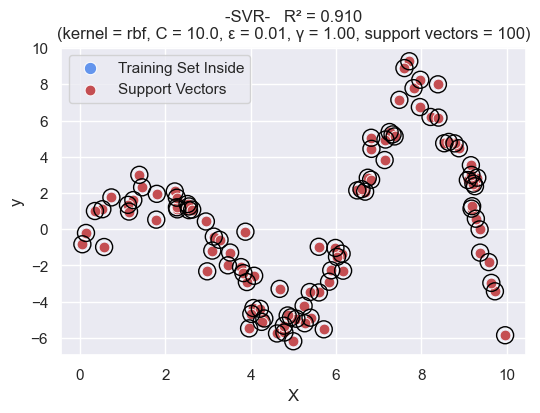

In [24]:
Plot_SVR_Model(df, best_model, best_score)

In this case we used all the data for training and testing, achieving `R²` = 0.910, almost identical to what we found using training and testing datasets. The best kernel was also `rbf`.

## Advertising Data

The Advertising data set consists of the sales of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [25]:
# Getting data
dfA = pd.read_csv('advertising.csv')
print(dfA.shape)
dfA.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Descriptive Statistics

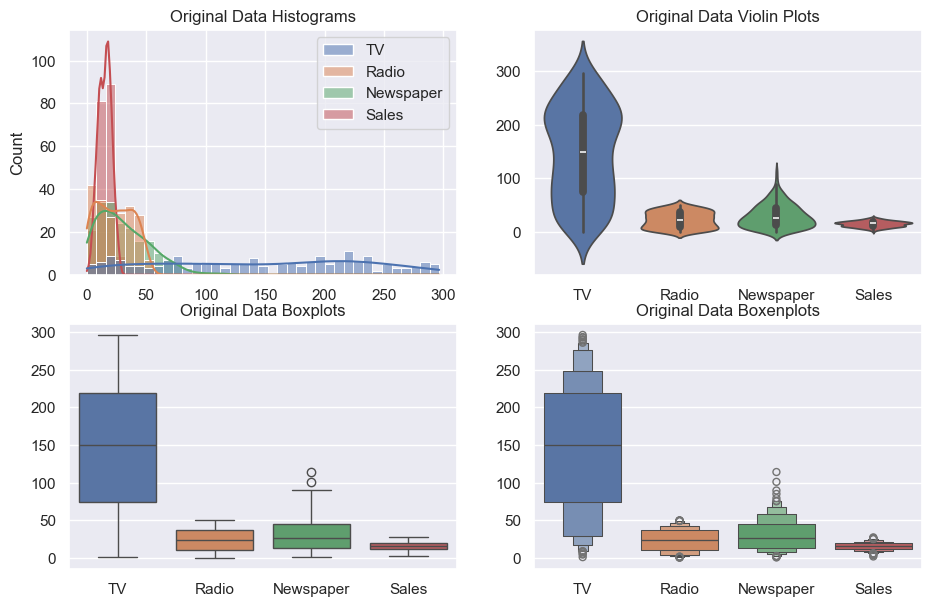

In [26]:
plt.figure(figsize=(11, 7))

plt.subplot(221)
sns.histplot(data = dfA, kde=True).set(title="Original Data Histograms")

plt.subplot(222)
sns.violinplot(data = dfA).set(title="Original Data Violin Plots")

plt.subplot(223)
sns.boxplot(data = dfA).set(title="Original Data Boxplots")

plt.subplot(224)
sns.boxenplot(data = dfA).set(title="Original Data Boxenplots");

### Standardizing

In [27]:
# Feature Scaling
scaler = preprocessing.StandardScaler()
dfS = pd.DataFrame(scaler.fit_transform(dfA), columns=['TV', 'Radio', 'Newspaper', 'Sales'])
dfS.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455


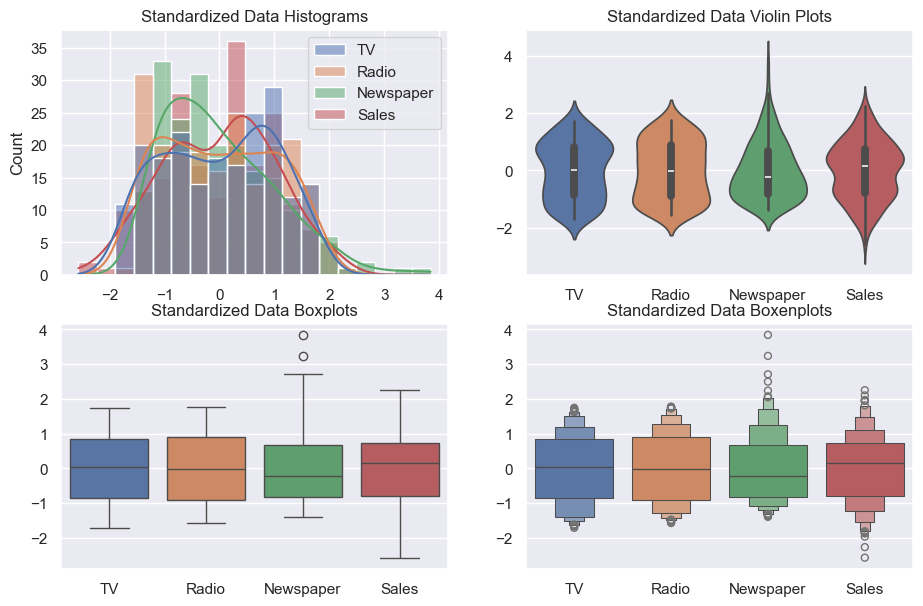

In [28]:
plt.figure(figsize=(11, 7))

plt.subplot(221)
sns.histplot(data = dfS, kde=True).set(title="Standardized Data Histograms")

plt.subplot(222)
sns.violinplot(data = dfS).set(title="Standardized Data Violin Plots")

plt.subplot(223)
sns.boxplot(data = dfS).set(title="Standardized Data Boxplots")

plt.subplot(224)
sns.boxenplot(data = dfS).set(title="Standardized Data Boxenplots");

## SVR Simple Regression Model

Let's create a SVR Model with the features:
- `dfS.TV` as a feature matrix
- `dfS.Sales` as a target variable

Let's use out previous method `SVR_plot`

In [29]:
data = pd.DataFrame({'X': dfS.TV, 'y': dfS.Sales})
data.head()

,X,y
0,0.969852,1.322319
1,-1.197376,-0.897515
2,-1.516155,-0.593948
3,0.052050,0.259834
4,0.394182,0.525455


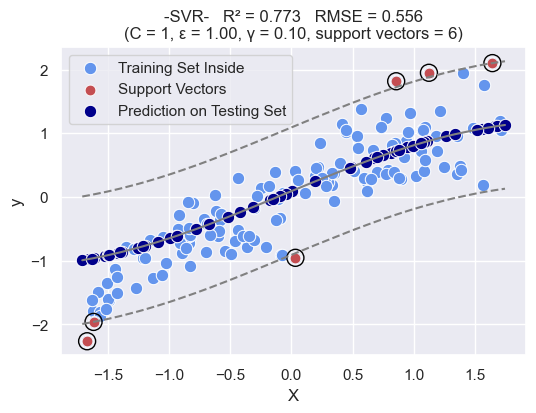

In [30]:
SVR_plot(data)

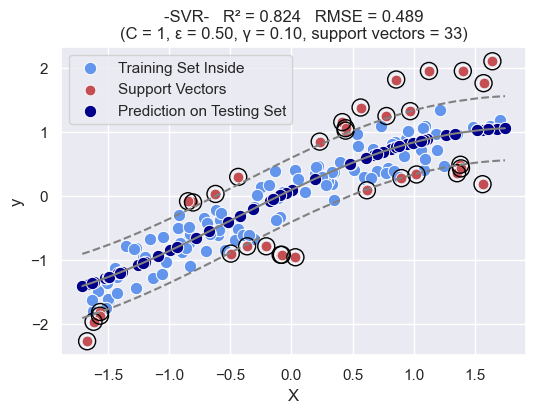

In [31]:
# Reducing the epsilon value
SVR_plot(data, epsilon = 0.5)

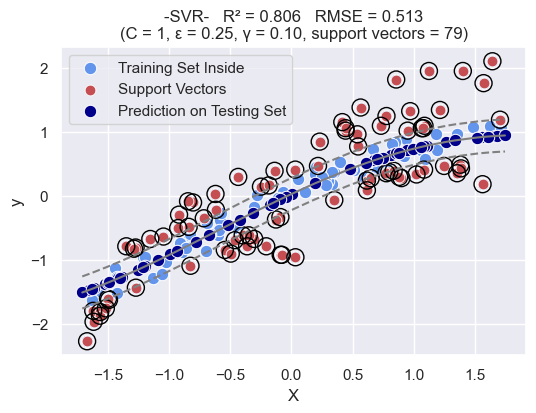

In [32]:
# Reducing the epsilon value
SVR_plot(data, epsilon = 0.25)

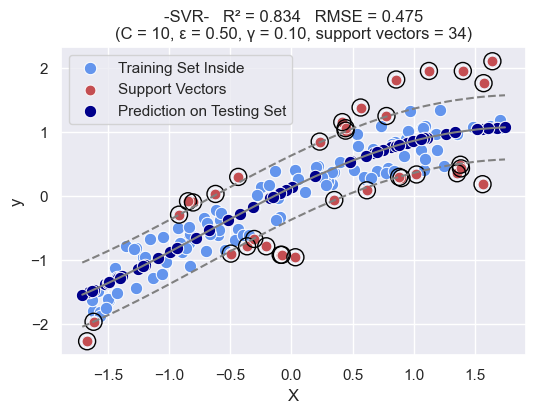

In [33]:
# Increasing C and keeping epsilon at it best value (0.5)
SVR_plot(data, epsilon = 0.5, C=10)

- The higher the R², the better the model. The best model is the last one with R² = 0.834


- The lower the RMSE, the better the model. The best model is the last one with RMSE = 0.474

## SVR Multiple Regression Model

Let's create a more complicated model. The feature matrix will now be composed of three variables: `TV`, `Radio`, and `Newspaper`. Notice that the graphical representation is not an option anymore.

In [34]:
# Features matrix
X2 = dfS[['TV', 'Radio', 'Newspaper']]
# Target variable
y = dfS.Sales

In [35]:
# Splitting the sample into train and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.30, random_state=20)
print(f'Train Set: {X_train2.shape[0]} cases, \tTest Set: {X_test2.shape[0]} cases') 

Train Set: 140 cases, 	Test Set: 60 cases


In [36]:
# Saving training data
data_train2 = pd.concat([X_train2, y_train2], axis=1)
print(data_train2.shape)
data_train2.head()

(140, 4)


,TV,Radio,Newspaper,Sales
134,-1.286120,1.035541,1.613231,-0.821623
62,1.077280,-0.524253,-0.149788,1.056698
20,0.833233,0.299535,1.051643,0.544428
21,1.055093,-1.226498,-0.324708,0.449564
45,0.327624,-0.051588,0.043546,0.183943


In [37]:
# Saving testing data
data_test2 = pd.concat([X_test2, y_test2], axis=1)
print(data_test2.shape)
data_test2.head()

(60, 4)


,TV,Radio,Newspaper,Sales
150,1.560702,-0.632291,0.296721,0.183943
28,1.188210,0.259020,-0.352328,0.715185
13,-0.578502,-1.057689,-1.075027,-0.271408
178,1.513995,-1.415564,-0.315502,0.316753
109,1.265277,0.245516,-1.153281,0.885941


### SVR Model (epsilon = 1 and C = 1)

In [38]:
# Using the train set
model2 = SVR(kernel='rbf', epsilon=1, C=1)  
svr2   = model2.fit(X_train2, y_train2)
print(f'Number of support vectors: {len(svr2.support_vectors_)}')

Number of support vectors: 11


In [39]:
# Prediction with training and testing cases
data_train2['y_pred_e1_C1'] = model2.predict(X_train2)
data_test2['y_pred_e1_C1'] = model2.predict(X_test2)

In [40]:
# Computing R²
print(f'SVR (epsilon = 1, C = 1) Training Set: R² = {r2_score(data_train2.Sales, data_train2.y_pred_e1_C1):.3f}')

print(f'SVR (epsilon = 1, C = 1) Testing  Set: R² = {r2_score(data_test2.Sales, data_test2.y_pred_e1_C1):.3f}') 

SVR (epsilon = 1, C = 1) Training Set: R² = 0.729
SVR (epsilon = 1, C = 1) Testing  Set: R² = 0.669


### SVR Model (epsilon = 0.5 and C = 1)

In [41]:
# Using the train set
model3 = SVR(kernel='rbf', epsilon=0.5, C=1)  
svr3   = model3.fit(X_train2, y_train2)
print(f'Number of support vectors: {len(svr3.support_vectors_)}')

Number of support vectors: 20


In [42]:
# Prediction with training and testing cases
data_train2['y_pred_e05_C1'] = model3.predict(X_train2)
data_test2['y_pred_e05_C1']  = model3.predict(X_test2)

In [43]:
# Computing R²
print(f'SVR (epsilon = 0.5, C = 1) Training Set: R² = {r2_score(data_train2.Sales, data_train2.y_pred_e05_C1):.3f}')
print(f'SVR (epsilon = 0.5, C = 1) Testing  Set: R² = {r2_score(data_test2.Sales, data_test2.y_pred_e05_C1):.3f}')

SVR (epsilon = 0.5, C = 1) Training Set: R² = 0.897
SVR (epsilon = 0.5, C = 1) Testing  Set: R² = 0.852


### Model (epsilon = 0.5 and C = 10)

In [44]:
# Using the train set
model4 = SVR(kernel='rbf', epsilon=0.5, C=10)  
svr4   = model4.fit(X_train2, y_train2)
print(f'Number of support vectors: {len(svr4.support_vectors_)}')

Number of support vectors: 20


In [45]:
# Prediction with training and testing cases
data_train2['y_pred_e05_C10'] = model4.predict(X_train2)
data_test2['y_pred_e05_C10'] = model4.predict(X_test2)

In [46]:
# Computing R²
print(f'SVR (epsilon = 0.5, C = 1) Training Set: R² = {r2_score(data_train2.Sales, data_train2.y_pred_e05_C10):.4f}')
print(f'SVR (epsilon = 0.5, C = 1) Testing  Set: R² = {r2_score(data_test2.Sales, data_test2.y_pred_e05_C10):.4f}')

SVR (epsilon = 0.5, C = 1) Training Set: R² = 0.8916
SVR (epsilon = 0.5, C = 1) Testing  Set: R² = 0.8532


It can be complicated to determine the optimal values for `epsilon` and `C`. We can always train and test several versions of the model to get "good enough" hyperparameter values. But we are not changing `gamma` nor `kernel` (the most important parameter). If we need to get the best model, we should use a search algorithm like before.

### Searching for the best model for the Advertising dataset

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Extract features (all columns except 'y') and target ('y')
X = df.drop(columns=['y'])
y = df['y']

# Define a pipeline that includes scaling and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('svr', SVR())                 # Apply SVR
])

# Define the parameter grid including the kernel type and its associated parameters
param_grid = [
    {'svr__kernel': ['linear'], 
     'svr__C': [0.1, 1, 10],
     'svr__epsilon': [0.01, 0.1, 1]},
    
    {'svr__kernel': ['poly'], 
     'svr__C': [0.1, 1, 10],
     'svr__epsilon': [0.01, 0.1, 1],
     'svr__degree': [2, 3, 4], 
     'svr__coef0': [0.0, 0.1, 1]},
    
    {'svr__kernel': ['rbf'], 
     'svr__C': [0.1, 1, 10], 
     'svr__epsilon': [0.01, 0.1, 1],
     'svr__gamma': [0.01, 0.1, 1]},

    {'svr__kernel': ['sigmoid'], 
     'svr__C': [0.1, 1, 10], 
     'svr__epsilon': [0.01, 0.1, 1],
     'svr__gamma': [0.01, 0.1, 1], 
     'svr__coef0': [0.0, 0.1, 1]}
]

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1, error_score='raise')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print(f"Best parameters found: {best_params}")
print(f"Best score: {best_score}")
print(f"Best model: {best_model}")

Fitting 5 folds for each of 198 candidates, totalling 990 fits
Best parameters found: {'svr__C': 10, 'svr__epsilon': 0.01, 'svr__gamma': 1, 'svr__kernel': 'rbf'}
Best score: 0.9097171200358896
Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=10, epsilon=0.01, gamma=1))])


The best score, 0.910, is a little better than our previous manual search, 0.897.

## Conclusions

Key Takeaways:
- SVR models, with their ability to fit within a specified epsilon margin, provided flexible fitting to complex, non-linear data patterns.
- Optimal hyperparameter tuning, specifically the regularization parameter C and the margin tolerance epsilon, was crucial for balancing the trade-off between model complexity and learning from the training data.
- For synthetic data, adjusting epsilon demonstrated how increasing the tube size could reduce the model's sensitivity to individual data points, affecting the fit and generalizability.
- Increasing the penalty parameter C improved the fit by reducing the margin violations and focusing more on fitting the support vectors correctly.
- The multiple regression model on the advertising dataset demonstrated how SVR could be adapted for multivariate scenarios, although visual interpretation becomes challenging.
- The best-performing models had the highest R² values and the lowest RMSE, indicating strong predictive accuracy and fit to the data.

## References

- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5